<a href="https://colab.research.google.com/github/akhils-codes1/ML4Crypto-2022/blob/main/3_r2_vs_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.6 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
import timm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!ls /content/gdrive/MyDrive/Files/3_ri_vs_random

3_10_round10_vs_random.zip  3_3_round3_vs_random.zip  3_7_round7_vs_random.zip
3_1_round1_vs_random	    3_4_round4_vs_random.zip  3_8_round8_vs_random.zip
3_1_round1_vs_random.zip    3_5_round5_vs_random.zip  3_9_round9_vs_random.zip
3_2_round2_vs_random.zip    3_6_round6_vs_random.zip


In [ ]:
%cd /content/gdrive/MyDrive/Files/3_ri_vs_random

/content/gdrive/MyDrive/Files/3_ri_vs_random


In [ ]:
!ls

3_10_round10_vs_random.zip  3_3_round3_vs_random.zip  3_7_round7_vs_random.zip
3_1_round1_vs_random	    3_4_round4_vs_random.zip  3_8_round8_vs_random.zip
3_1_round1_vs_random.zip    3_5_round5_vs_random.zip  3_9_round9_vs_random.zip
3_2_round2_vs_random.zip    3_6_round6_vs_random.zip


In [ ]:
!unzip '/content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random.zip' -d '/content/gdrive/MyDrive/Files/3_ri_vs_random'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/0_2.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/2_4.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/2_14.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/2_18.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/2_23.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/0_39.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/0_42.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/0_45.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/2_46.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random/0_48.png  
  inflating: /content/gdrive/MyDrive/Files/3_ri_vs_

In [ ]:
path = Path('/content/gdrive/MyDrive/Files/3_ri_vs_random/3_2_round2_vs_random')

In [ ]:
files = get_image_files(path)
#files[0]

In [ ]:
len(files)

12000

In [ ]:
pat = r'^(.*)_\d+.png'

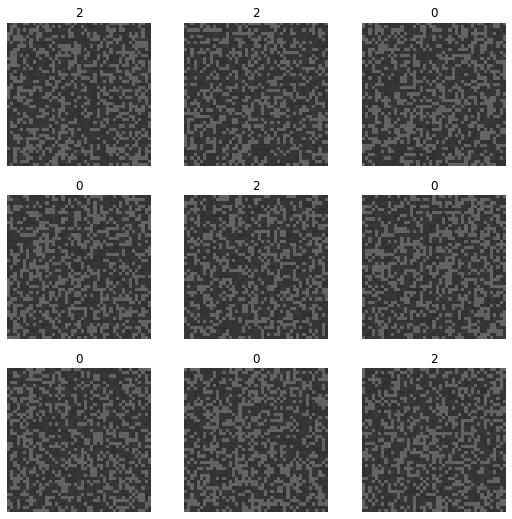

In [ ]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

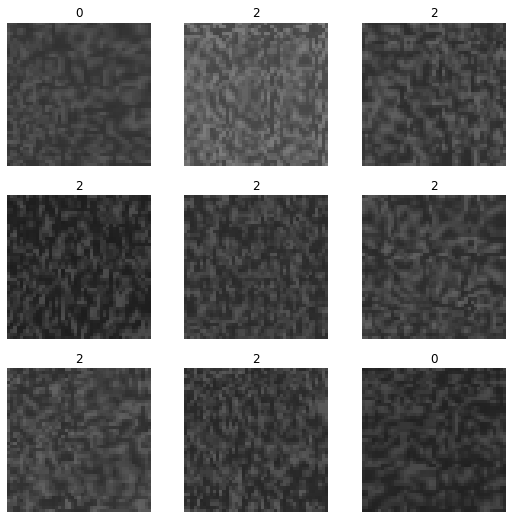

In [ ]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.156434,0.899116,0.484583,00:34


epoch,train_loss,valid_loss,accuracy,time
0,1.014041,0.760528,0.493750,00:35
1,0.995178,0.752938,0.485417,00:35
2,0.942972,0.767579,0.476667,00:34
3,0.871559,0.736275,0.505417,00:38
4,0.816617,0.708907,0.507083,00:34
5,0.792062,0.723766,0.500417,00:34
6,0.761287,0.706995,0.498750,00:34
7,0.753533,0.707069,0.505833,00:34
8,0.751456,0.706603,0.514583,00:38
9,0.738495,0.707545,0.509583,00:34


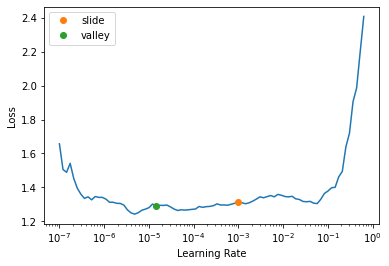

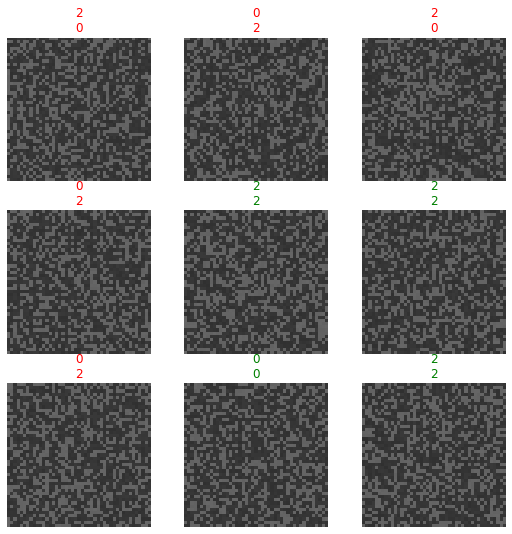

In [ ]:
architecture = 'convnext_nano'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.073071,0.735097,0.508750,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.859682,0.703636,0.480833,00:34
1,0.803574,0.702845,0.488750,00:34
2,0.759641,0.696354,0.474167,00:38
3,0.733018,0.694084,0.512917,00:34
4,0.723618,0.693040,0.511250,00:34
5,0.711487,0.704330,0.484167,00:34
6,0.704700,0.694067,0.485833,00:35
7,0.701870,0.694477,0.483750,00:36
8,0.702157,0.692873,0.511667,00:36
9,0.698850,0.693051,0.509167,00:34


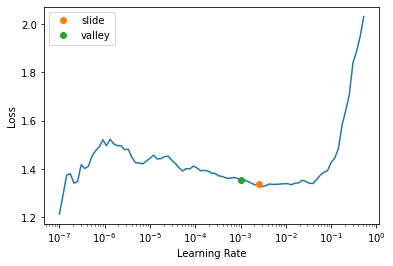

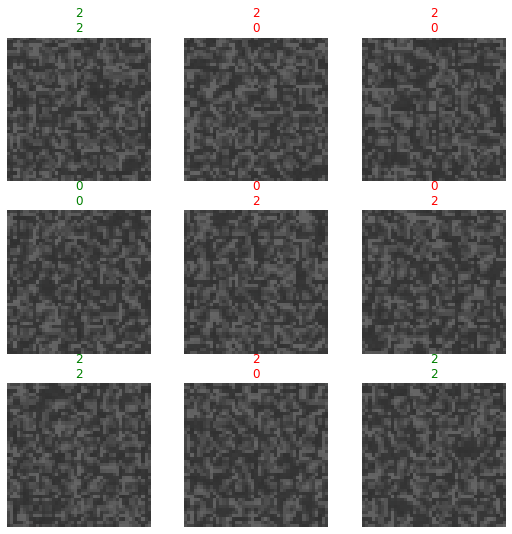

In [ ]:
# architecture = 'convnext_nano'
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#pnasnet5large

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/pnasnet5large-bf079911.pth" to /root/.cache/torch/hub/checkpoints/pnasnet5large-bf079911.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.933896,0.891587,0.514583,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.785171,0.893927,0.497083,01:09
1,0.779218,0.755764,0.504167,01:07
2,0.771474,0.735389,0.512500,01:09
3,0.790343,0.818648,0.483333,01:07
4,0.767781,0.757836,0.489167,01:08
5,0.751983,0.751802,0.482500,01:08
6,0.716293,0.802521,0.507917,01:11
7,0.693207,0.798750,0.479583,01:06
8,0.677447,0.807708,0.492917,01:09
9,0.668031,0.820066,0.475417,01:06


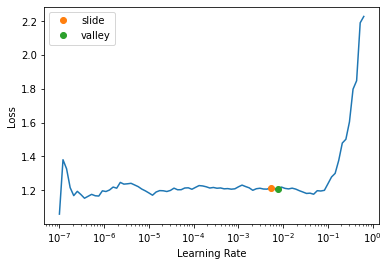

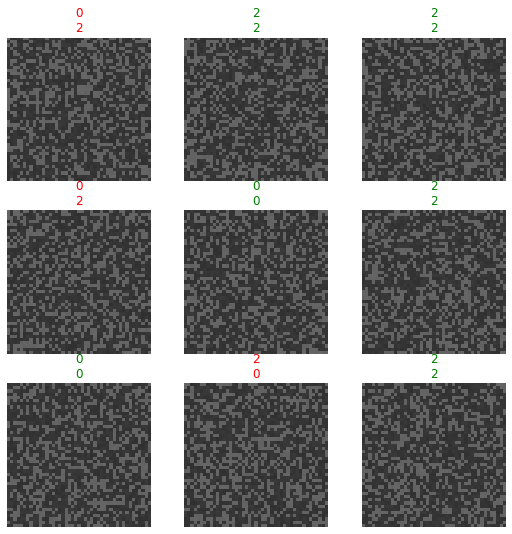

In [ ]:
architecture = 'pnasnet5large'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.906518,0.972300,0.515833,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.800752,0.861504,0.486667,01:12
1,0.771679,0.896620,0.498750,01:12
2,0.772890,0.767049,0.490833,01:13
3,0.762152,0.749602,0.522917,01:10
4,0.753977,0.722314,0.519167,01:12
5,0.749864,0.732328,0.508750,01:09
6,0.730408,0.746386,0.508333,01:12
7,0.723387,0.715724,0.484167,01:10
8,0.711133,0.711743,0.482500,01:12
9,0.715889,0.717896,0.481667,01:10


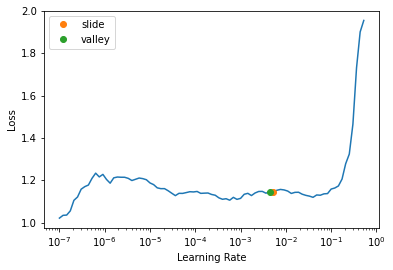

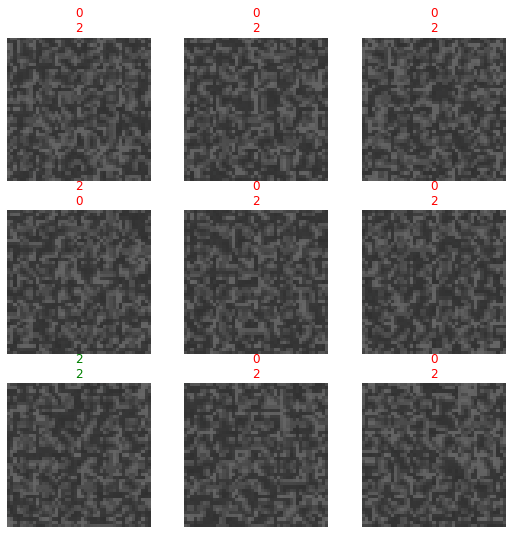

In [ ]:
# architecture = 'pnasnet5large'
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet34

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet34-43635321.pth" to /root/.cache/torch/hub/checkpoints/resnet34-43635321.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.000646,0.779939,0.502500,00:36


epoch,train_loss,valid_loss,accuracy,time
0,0.742262,0.721013,0.496250,00:33
1,0.719588,0.720268,0.497500,00:34
2,0.716246,0.717058,0.536667,00:33
3,0.691059,0.774282,0.489167,00:33
4,0.653959,0.756128,0.508333,00:36
5,0.592934,0.843136,0.498333,00:33
6,0.491314,0.923755,0.506667,00:33
7,0.415315,1.031185,0.500000,00:33
8,0.365141,1.067442,0.502500,00:33
9,0.349552,1.093746,0.505417,00:36


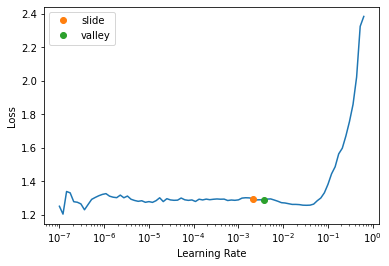

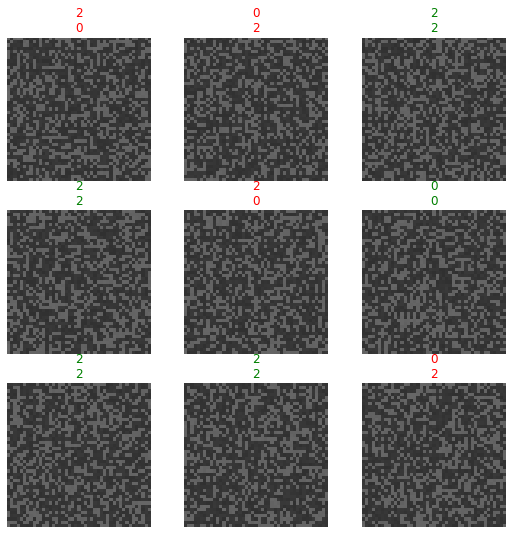

In [ ]:
architecture = 'resnet34'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.082554,0.808997,0.501250,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.866347,0.739593,0.503333,00:33
1,0.781252,0.718591,0.507083,00:33
2,0.728573,0.709516,0.490000,00:33
3,0.715327,0.709156,0.471250,00:36
4,0.711516,0.700140,0.506250,00:33
5,0.708528,0.696052,0.497083,00:33
6,0.703952,0.696710,0.504167,00:33
7,0.700495,0.695589,0.498333,00:33
8,0.695503,0.694262,0.514583,00:37
9,0.697640,0.693761,0.504167,00:33


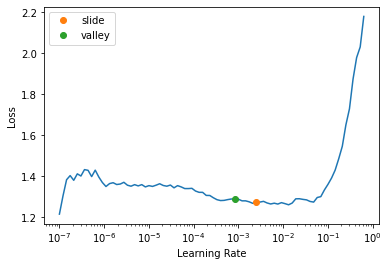

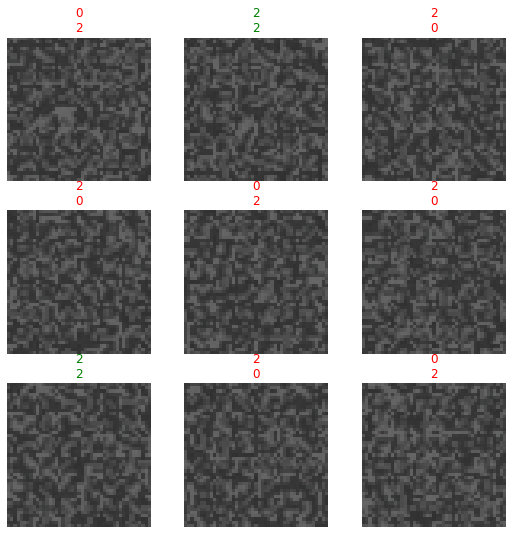

In [ ]:
# architecture = 'resnet34'
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.958881,0.783768,0.486667,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.735047,0.901324,0.511667,00:51
1,0.728700,0.750004,0.498750,00:47
2,0.727505,0.779029,0.482917,00:48
3,0.725678,0.820607,0.487083,00:51
4,0.724311,0.794268,0.478333,00:47
5,0.720073,0.725217,0.490833,00:47
6,0.711321,0.778960,0.494167,00:48
7,0.708709,0.827145,0.511667,00:51
8,0.696369,0.747212,0.505417,00:47
9,0.695728,0.697721,0.504583,00:48


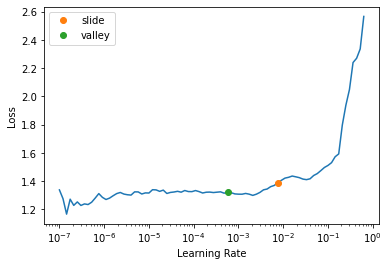

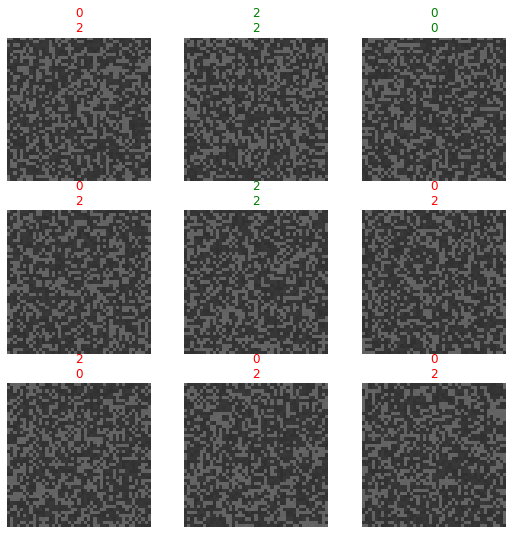

In [ ]:
architecture = 'resnet152'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.214530,0.778467,0.512083,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.916932,0.746822,0.486667,00:48
1,0.807429,0.710219,0.519583,00:48
2,0.744456,0.694502,0.525000,00:48
3,0.714858,0.705186,0.492500,00:51
4,0.707077,0.709845,0.503750,00:48
5,0.704771,0.692080,0.509583,00:47
6,0.700593,0.696200,0.495833,00:48
7,0.699374,0.695579,0.501250,00:52
8,0.696801,0.693928,0.505833,00:48
9,0.696379,0.693954,0.497083,00:48


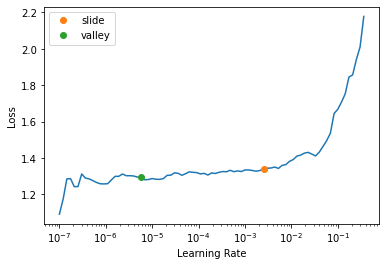

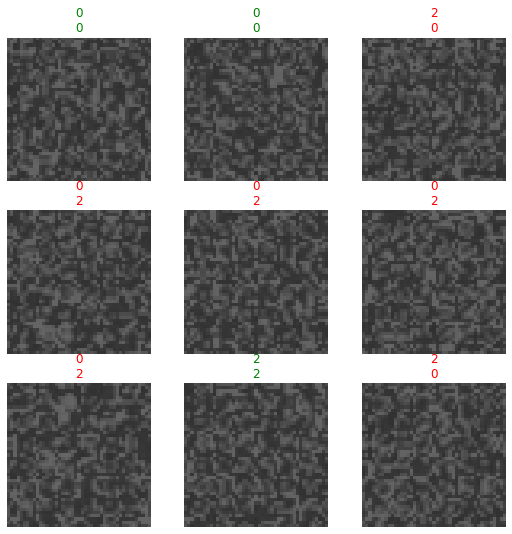

In [ ]:
# architecture = 'resnet152'
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#DarkNet53

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.087969,0.856253,0.500833,00:34


epoch,train_loss,valid_loss,accuracy,time
0,0.804741,0.767651,0.498750,00:36
1,0.755578,0.738109,0.497917,00:35
2,0.723960,0.708032,0.492083,00:35
3,0.724826,0.723352,0.525000,00:39
4,0.701536,0.711733,0.503750,00:36
5,0.672646,0.745983,0.507917,00:36
6,0.648715,0.756900,0.517500,00:36
7,0.607016,0.780544,0.513333,00:36
8,0.595149,0.764225,0.521250,00:39
9,0.583148,0.781908,0.515417,00:36


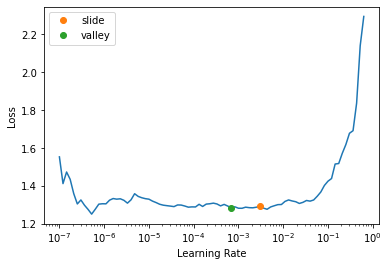

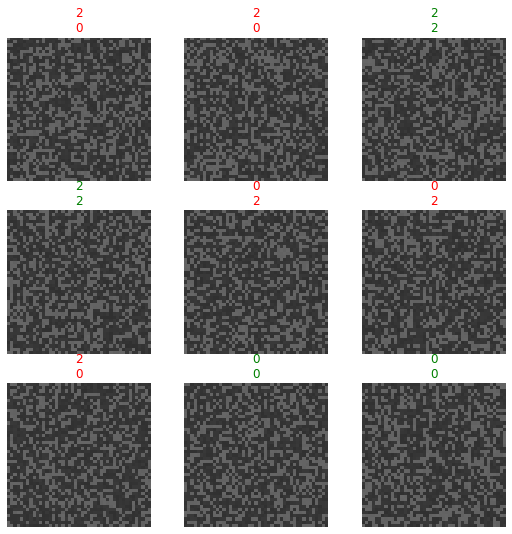

In [ ]:
architecture = 'darknet53'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.950413,1.185221,0.494167,00:34


epoch,train_loss,valid_loss,accuracy,time
0,0.771339,0.863516,0.497500,00:36
1,0.747201,1.016279,0.499167,00:39
2,0.774500,1.195979,0.514583,00:36
3,0.814420,1.603056,0.489583,00:36
4,0.805978,1.192479,0.490417,00:36
5,0.787299,0.810216,0.492083,00:36
6,0.782219,0.740480,0.517083,00:39
7,0.754187,1.048319,0.494583,00:36
8,0.745794,0.880710,0.482917,00:39
9,0.738582,0.801612,0.480417,00:36


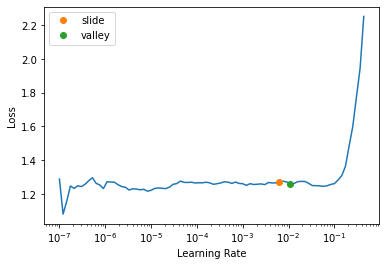

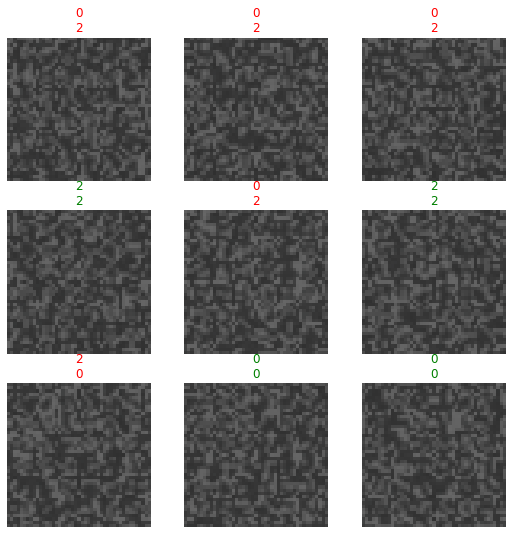

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.981945,0.736622,0.508333,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.722720,0.712960,0.500417,00:48
1,0.723593,0.711857,0.498333,00:48
2,0.735755,0.742022,0.494167,00:52
3,0.731538,0.716102,0.502500,00:48
4,0.716438,0.722550,0.488750,00:48
5,0.701184,0.728998,0.495000,00:51
6,0.686042,0.739150,0.487083,00:48
7,0.663806,0.737228,0.508750,00:48
8,0.641818,0.749021,0.500000,00:48
9,0.638764,0.749252,0.505000,00:51


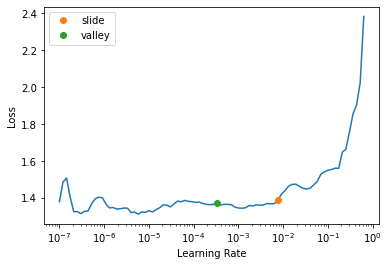

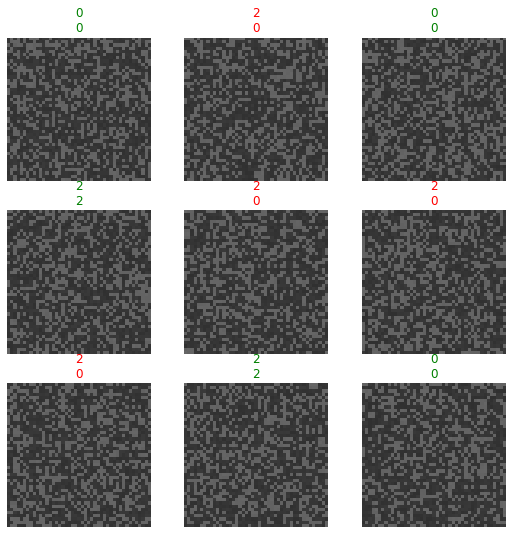

In [ ]:
architecture = 'resnext101_64x4d'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.968603,0.792647,0.489583,00:43


epoch,train_loss,valid_loss,accuracy,time
0,0.725985,0.715338,0.502500,00:49
1,0.728295,0.721676,0.490417,00:52
2,0.739329,0.806545,0.487500,00:49
3,0.733894,0.719622,0.499167,00:49
4,0.727662,0.724080,0.495417,00:49
5,0.725021,0.700227,0.508333,00:52
6,0.713270,0.746398,0.503333,00:48
7,0.705285,0.703117,0.506250,00:48
8,0.700545,0.698922,0.512500,00:49
9,0.698562,0.702568,0.496667,00:52


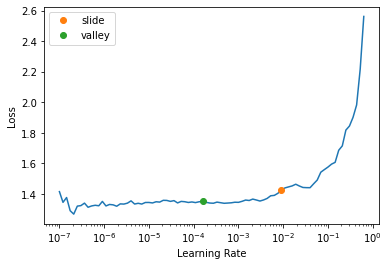

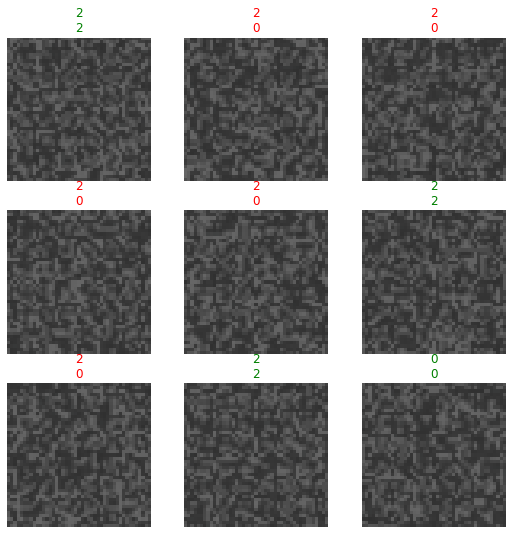

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

#densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.982817,0.969085,0.477917,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.733936,0.736907,0.499583,00:44
1,0.726739,0.751062,0.507500,00:48
2,0.738670,0.760829,0.497917,00:44
3,0.739747,0.730405,0.502917,00:44
4,0.719419,0.743538,0.485417,00:44
5,0.704496,0.746868,0.484583,00:48
6,0.681018,0.741786,0.504167,00:44
7,0.653029,0.775857,0.499167,00:44
8,0.630863,0.755071,0.508750,00:44
9,0.619316,0.756949,0.507083,00:47


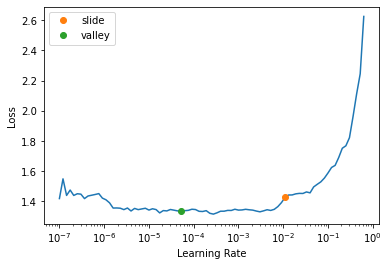

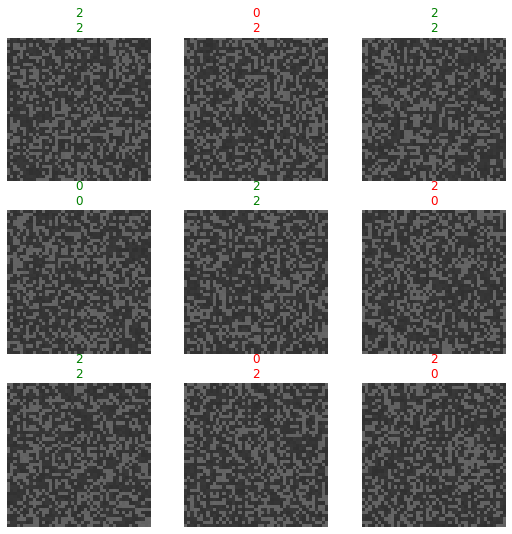

In [ ]:
architecture = 'densenet121'
learn = vision_learner(dls1, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,1.158918,2.606938,0.495417,00:41


epoch,train_loss,valid_loss,accuracy,time
0,0.888919,1.259829,0.486667,00:45
1,0.787952,0.716272,0.495833,00:48
2,0.734198,1.417778,0.486667,00:45
3,0.715501,0.804342,0.509583,00:45
4,0.705970,0.759882,0.512500,00:48
5,0.706875,0.697307,0.492500,00:45
6,0.703102,0.693073,0.504167,00:45
7,0.700924,0.701764,0.488750,00:45
8,0.698805,0.704587,0.513750,00:48
9,0.700607,0.715661,0.513750,00:45


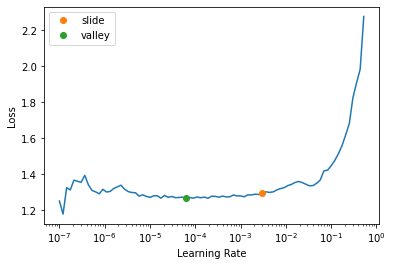

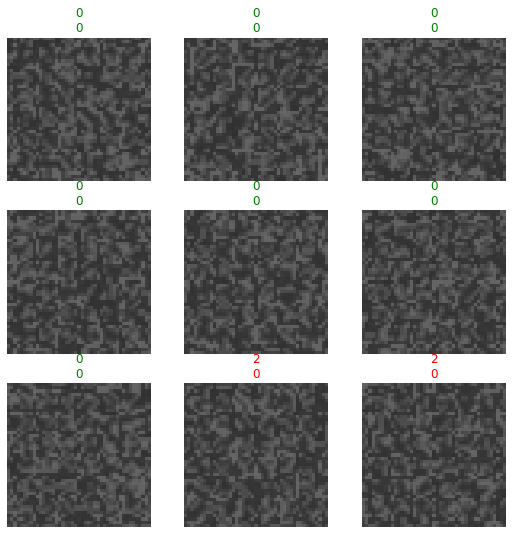

In [ ]:
learn = vision_learner(dls2, architecture , metrics=accuracy)
x = learn.lr_find(suggest_funcs=(slide, valley))
lr = (x[0]+x[1])/2.0
learn.fine_tune(10,lr)
learn.show_results()